In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [5]:
from imblearn.over_sampling import SMOTE

## Загрузим с помощью скрипта данные с сайта kaggle

In [6]:
cur_path = os.getcwd()
dataset_path = cur_path
print(cur_path)

/content


In [7]:
from download_dataset_from_kaggle_v10 import download_dataset

In [8]:
download_dataset()

In [9]:
data = pd.read_csv('winequalityN.csv')

In [10]:
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Видно, что некоторые столбцы имеют пропуски. Построим гистограммы распределений, в которых имеются пропуски, чтобы понять что с ними делать

In [12]:
def draw_hist_df(data, rows_num = 3, cols_num = 4, draw_all_plots = False):

  # rows_num = 3
  # cols_num = 4
  figure, axis = plt.subplots(rows_num, cols_num, figsize=(15, 9) )

  cur_col = 0
  cur_row = 0
  for i in data.keys():
    column_type = data[i].dtype
    null_counts = len(data[data[i].isnull()])

    if (column_type != 'object') & (null_counts > 0) & (draw_all_plots == False):
      axis[cur_row, cur_col].hist(data[i], bins = 20)
      axis[cur_row, cur_col].set_title(i)
    elif draw_all_plots == True:
      axis[cur_row, cur_col].hist(data[i], bins = 20)
      axis[cur_row, cur_col].set_title(i)

    cur_col += 1

    if cur_col >= cols_num:
      cur_row += 1
      cur_col = 0

In [13]:
tmp = data.copy()
tmp.drop(['type', 'quality'], inplace = True, axis = 1)

In [14]:
tmp.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

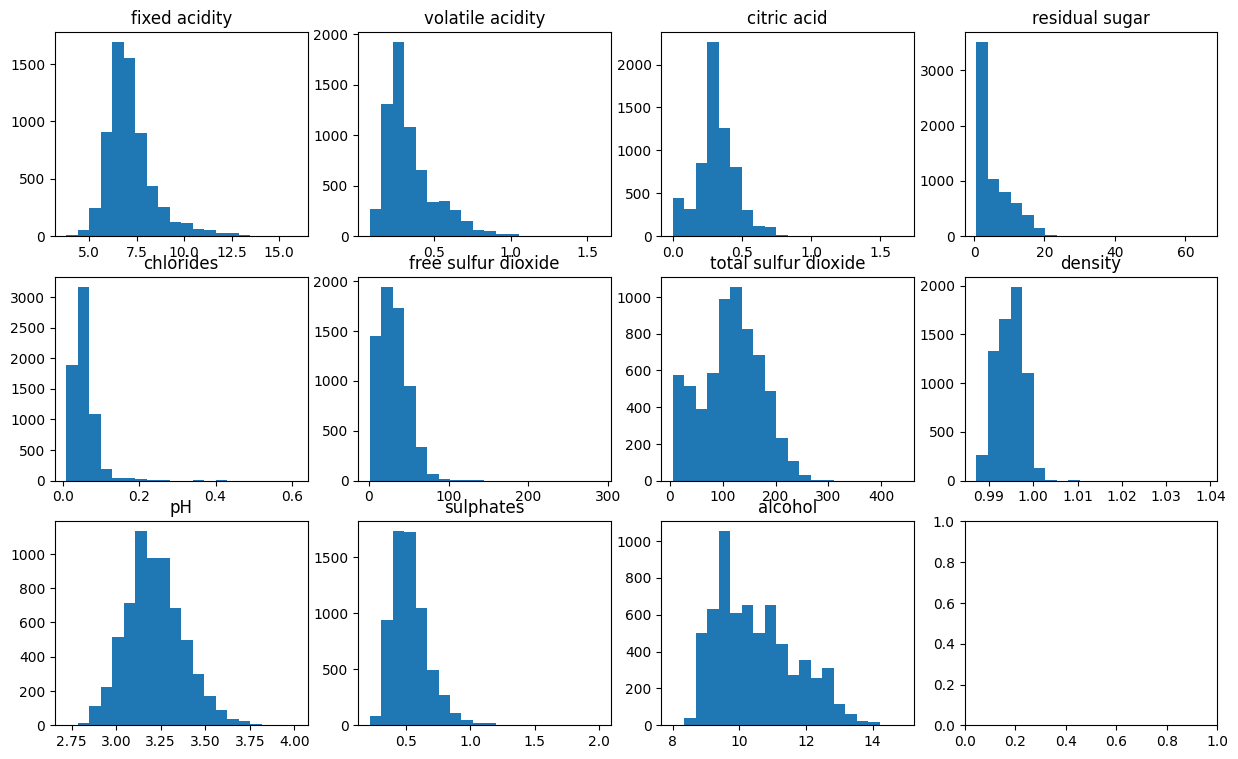

In [15]:
draw_hist_df(tmp, 3, 4, True)

In [16]:
labelencoder = LabelEncoder()

In [17]:
data['wine_category'] = labelencoder.fit_transform(data['type'].values)

In [18]:
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  wine_category  
0       0.45      8.8        6              1  
1       0.49      9.5        6              1  
2       0.44     10.1        6              1  
3       0.40      9.9        6              1  
4       0.40      9.9        6              1

In [19]:
data.groupby(by = ['type'])['wine_category'].count()

type
red      1599
white    4898
Name: wine_category, dtype: int64

In [20]:
data[data['wine_category']==0]['type'].value_counts()

red    1599
Name: type, dtype: int64

In [21]:
# draw_hist_df(data, 3, 4, False)

## fixed acidity, pH, sulphates - близки к симметричным распределениям, поэтому пропущенные значения лучше заполнить средним, остальные - модой

In [22]:
list_mean = ['fixed acidity', 'pH', 'sulphates']
list_mode = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides']

In [23]:
for i in data.keys():
  if i in list_mean:
    data[i].fillna(value = data[i].mean(), inplace = True)
    print('inside mean ', i)
  elif i in list_mode:
    data[i].fillna(value = data[i].mode().max(), inplace = True)
    # print('inside mode ', i, ' mode value = ', data[i].mode())

inside mean  fixed acidity
inside mean  pH
inside mean  sulphates


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  wine_category         6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [25]:
X = data.copy()

In [26]:
labels = data['quality']

In [27]:
labels.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [28]:
pd.DataFrame(labels.value_counts())

quality
6     2836
5     2138
7     1079
4      216
8      193
3       30
9        5

## Класс 9 - имеет только 5 значений, таким образом датасет несбалансирован

In [29]:
X.drop(['quality', 'type'], inplace = True, axis = 1)

In [30]:
corr = X.corr()

Text(0.5, 1.0, 'Correlation')

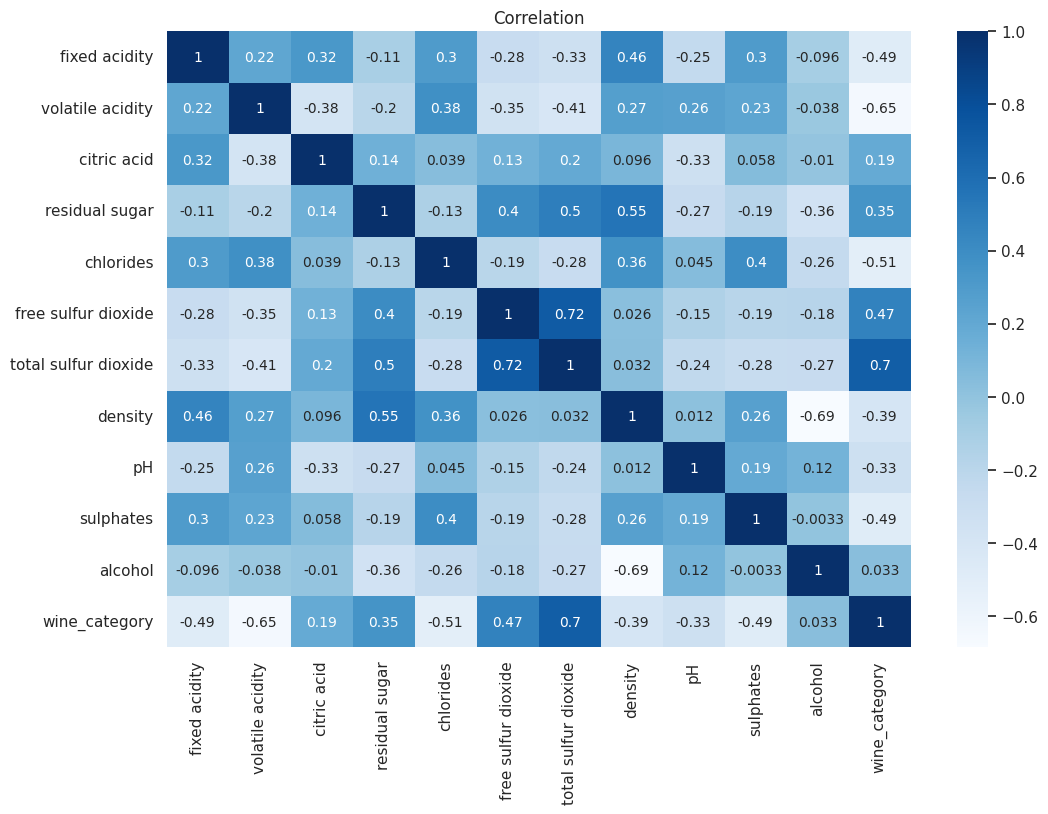

In [31]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr, annot = True, cmap = 'Blues', annot_kws = {'fontsize':10})
plt.title('Correlation')

Значительная корреляция наблюдается между "total sulfur dioxide" и "density" а также между "density" и "residual sugar"

In [32]:
def draw_boxplots(df, columns_list):

  fig, axs = plt.subplots( 1, len(columns_list), figsize = (16,5) )

  k = 0

  for i in columns_list:
    axs[k].boxplot( df[i] )
    axs[k].set_title(i)
    k += 1

In [33]:
columns_list = ['fixed acidity', 'pH', 'sulphates', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']

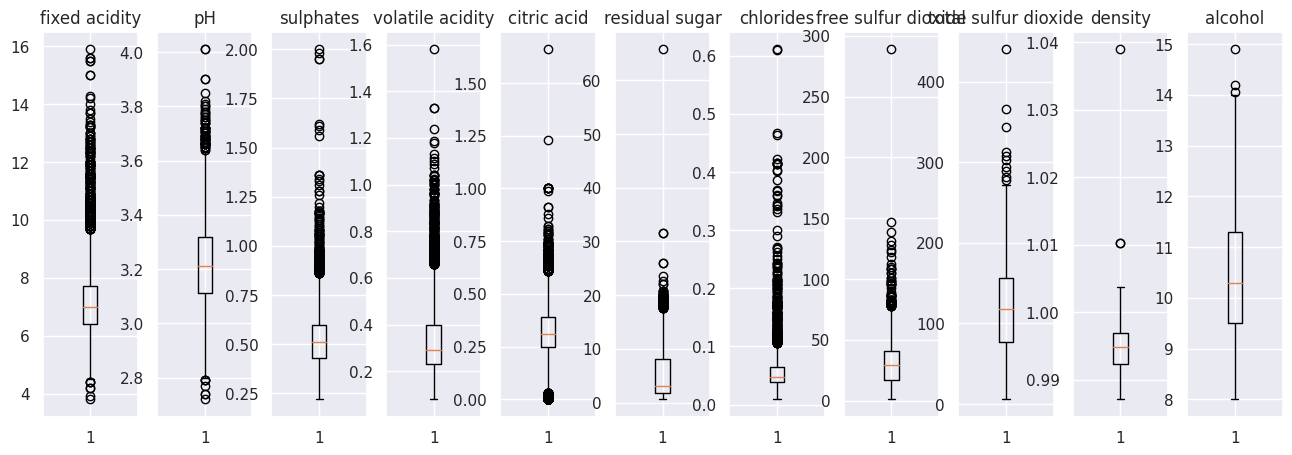

In [34]:
draw_boxplots(X, columns_list)

## Некоторые значения можно охарактеризовать как ошибки измерений и выкинуть их. НИже приведены фильры по которым произведен отбор. Всего отобрано 21 строка, что составляет 0.3% от всего датасета

In [35]:
index_to_del = X[
                    (X['chlorides'] > 0.5) |
                    (X['residual sugar'] > 60) |
                    (X['free sulfur dioxide'] > 200) |
                    (X['density'] > 1.01) |
                    (X['alcohol'] > 14) |
                    (X['citric acid'] > 0.98) |
                    (X['sulphates'] > 1.95) |
                    (X['volatile acidity'] > 1.5) |
                    (X['residual sugar'] > 25)
                ].index

In [36]:
print(f'Number row to delete = {len(index_to_del)},\nShare in dataset = {len(index_to_del)/len(X):.3f}')

Number row to delete = 21,
Share in dataset = 0.003


In [37]:
labels.drop(index_to_del, inplace = True)
X.drop(index_to_del, inplace = True)

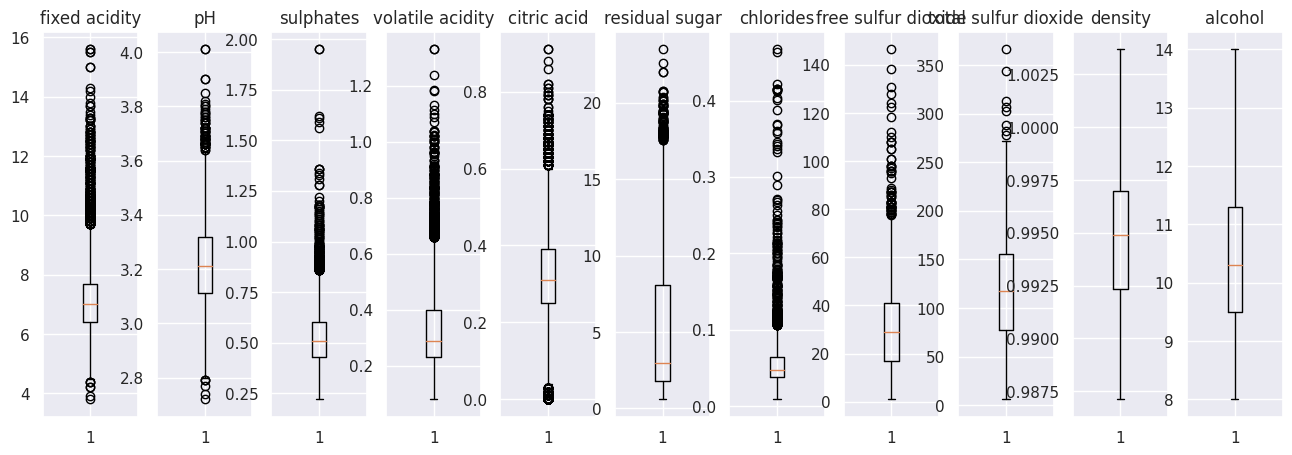

In [38]:
draw_boxplots(X, columns_list)

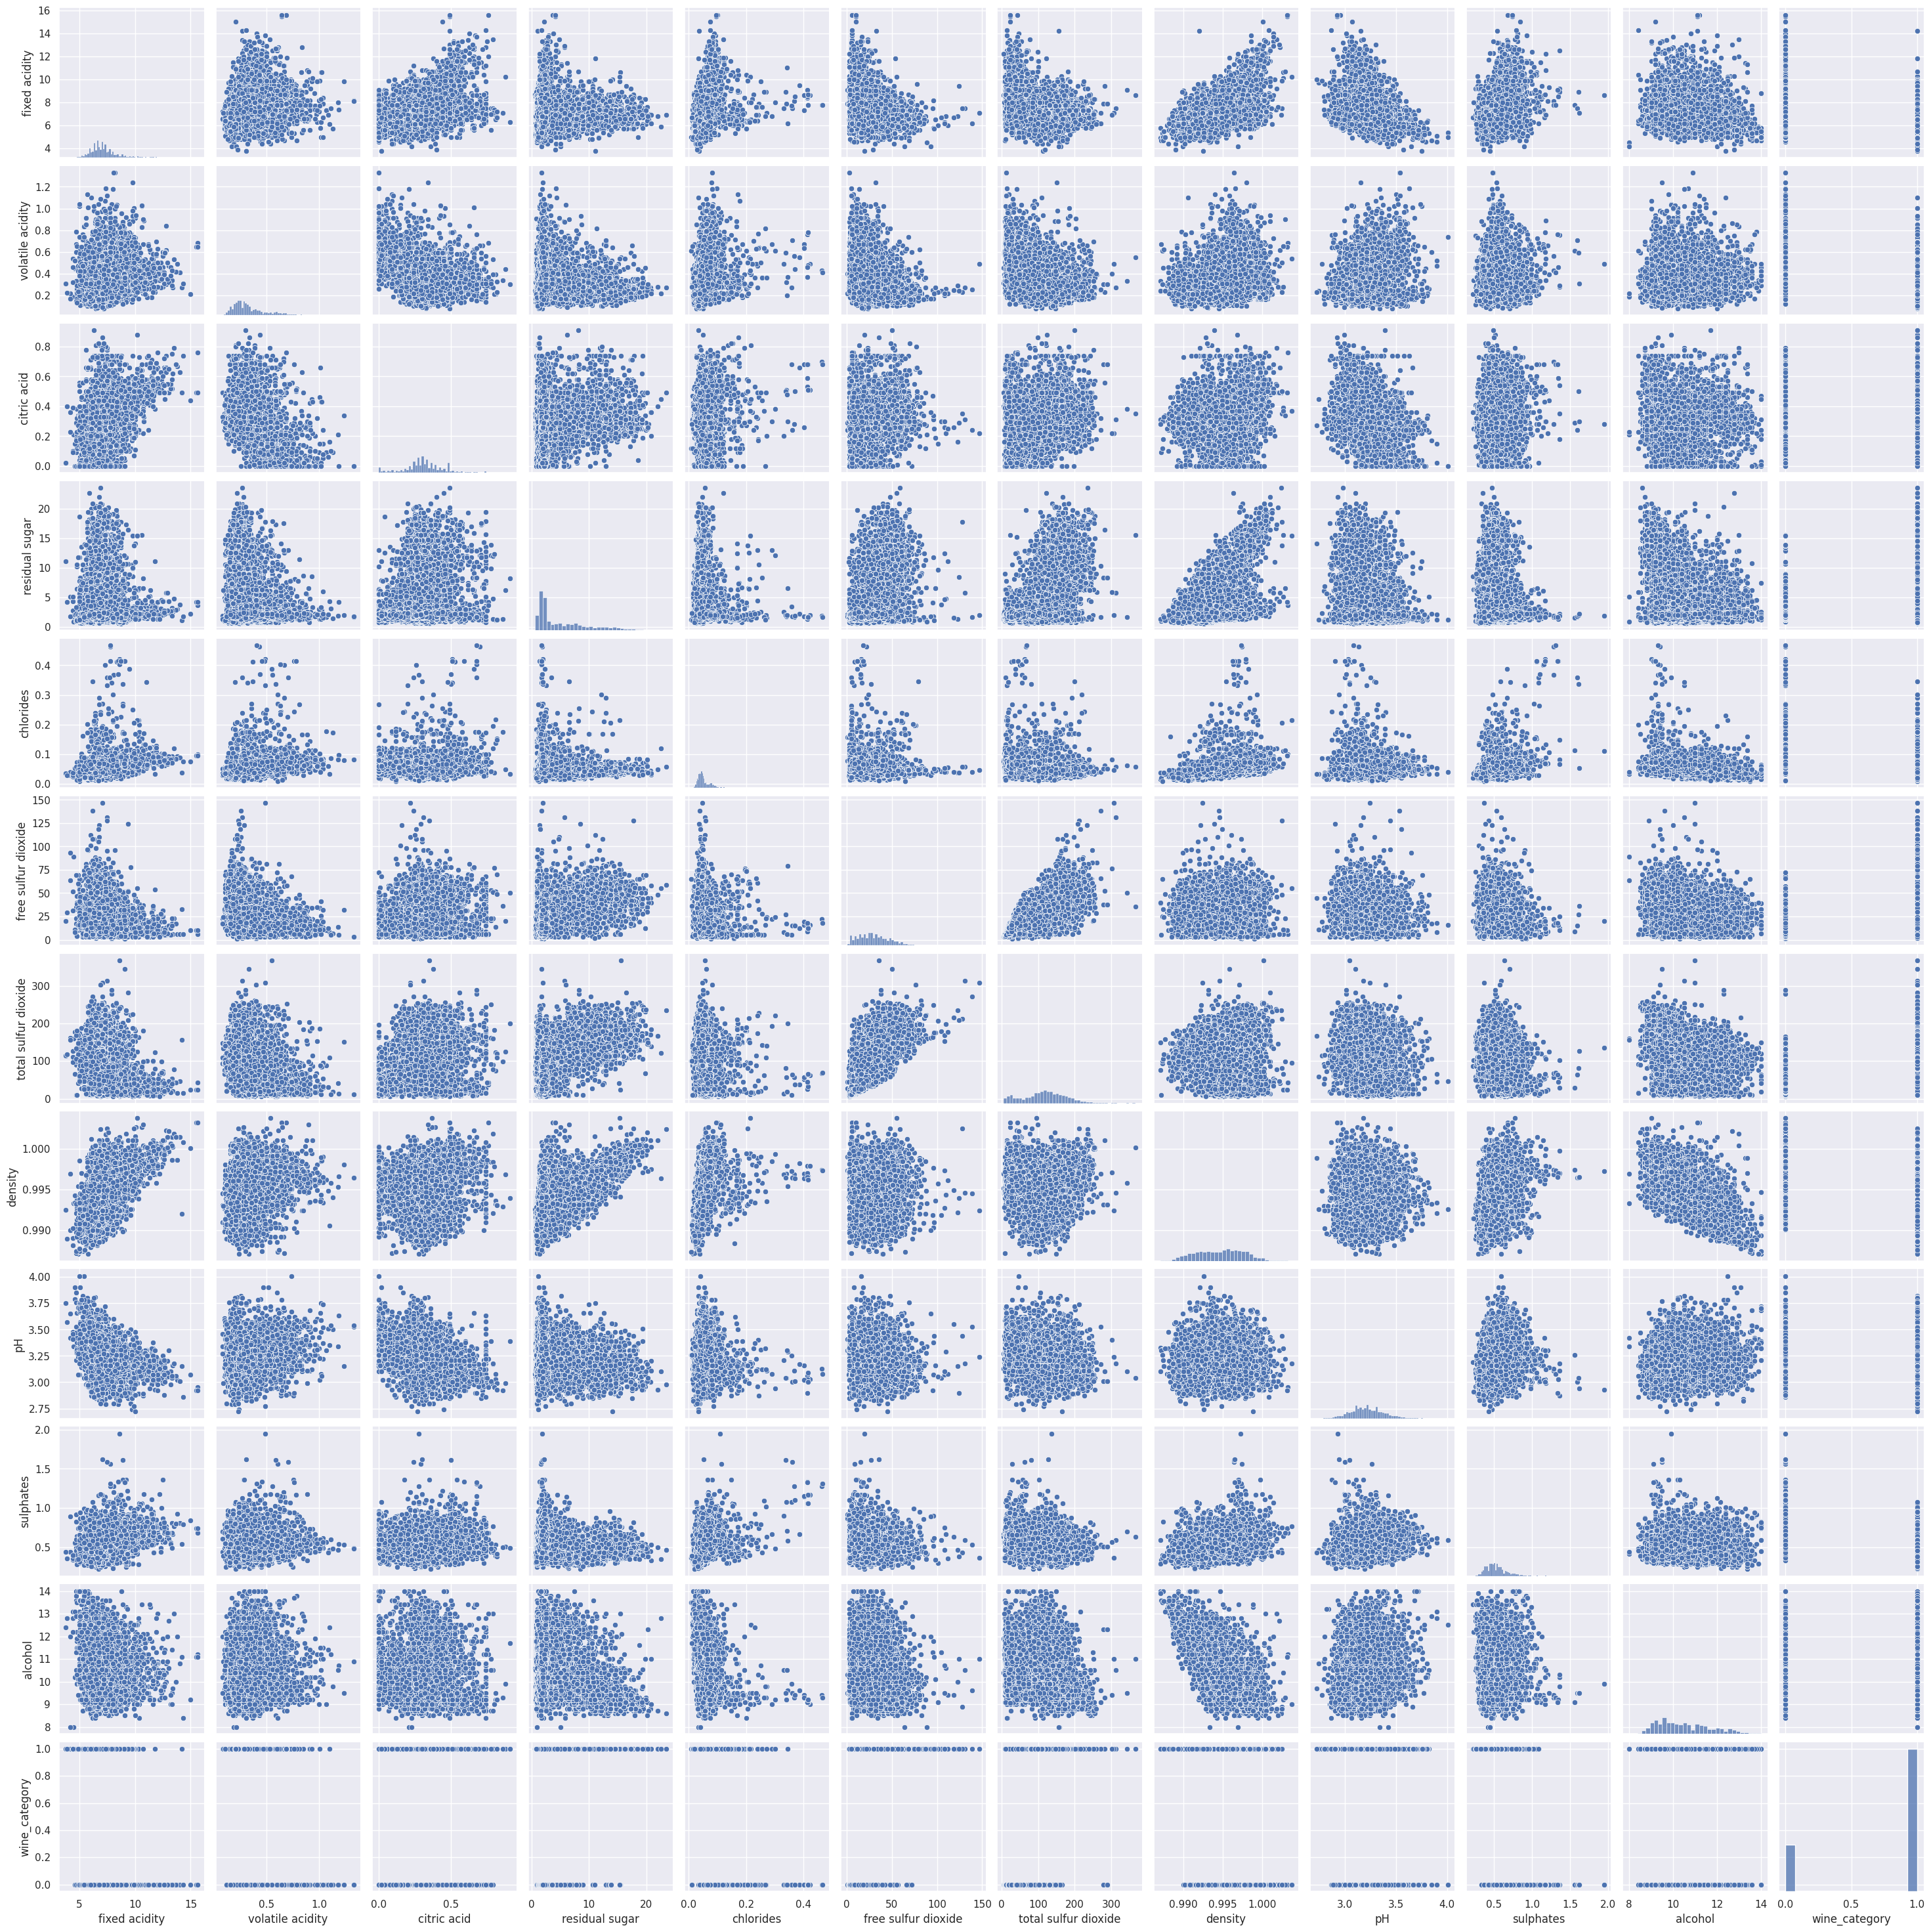

In [39]:
sns.pairplot(X)

In [40]:
# skewness = X.skew()

In [41]:
# for column_name, skewness_value in skewness.items():
#   if abs(skewness_value) > 0.5:
#     X[column_name] = np.log(X[column_name])

In [42]:
# draw_hist_df(X, 3, 4, True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, train_size = 0.8, random_state = 42)

In [44]:
y_train.value_counts()

6    2245
5    1712
7     857
4     174
8     161
3      26
9       5
Name: quality, dtype: int64

In [45]:
len( y_train), len(y_test)

(5180, 1296)

In [46]:
print(f'{len( y_train)/len(labels):.2f}%, {len(y_test)/len(labels):.2f}%')

0.80%, 0.20%


## Проведем балансировку тестового датасета с помощью oversampling-a

In [47]:
oversample = SMOTE(k_neighbors = 4)
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)

In [48]:
y_train_oversampled.value_counts()

6    2245
5    2245
7    2245
3    2245
4    2245
8    2245
9    2245
Name: quality, dtype: int64

In [49]:
# scale = StandardScaler()
# X_train_oversampled_scaled = scale.fit_transform(X_train_oversampled)
X_train_oversampled_scaled = X_train_oversampled.copy()

## Построим набор из 3 моделей с гиперпараметрами

In [50]:
models = [
          # {'name':'SVC','model': SVC(), 'params':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'random_state': [13]}},
          {'name':'RF','model': RandomForestClassifier(), 'params':{'n_estimators':[5, 10, 50, 100], 'criterion':['gini', 'entropy'], 'random_state': [13]}},
          {'name':'ET','model': ExtraTreeClassifier(), 'params':{'criterion':['gini', 'entropy'], 'random_state': [13]}},
          {'name':'SVC','model': SVC(), 'params':{'kernel':['poly', 'rbf', 'sigmoid'], 'random_state': [13]}}
         ]

In [51]:
res = []
for v in  models:
    cur_model = v['model']
    cur_params = v['params']
    grid = GridSearchCV(cur_model, cur_params, scoring = 'accuracy')
    grid.fit(X_train_oversampled_scaled, y_train_oversampled)
    # print('model params after grid', cur_model)

    cur_model_best = grid.best_estimator_
    cur_model_best.set_params(**grid.best_params_)
    cur_model_best.fit(X_train_oversampled_scaled, y_train_oversampled)
    acc_val = cur_model_best.score(X_test, y_test)

    res.append([grid.best_estimator_, grid.best_params_, grid.best_score_, acc_val])
    # print('data appended')


In [52]:
df = pd.DataFrame(res, columns =['model', 'model parameters', 'accuray train', 'accuracy test'])
df.sort_values(by = ['accuracy test'], ascending = False)

model  \
0  (DecisionTreeClassifier(max_features='sqrt', r...   
1  ExtraTreeClassifier(criterion='entropy', rando...   
2                               SVC(random_state=13)   

                                    model parameters  accuray train  \
0  {'criterion': 'gini', 'n_estimators': 100, 'ra...       0.882087   
1       {'criterion': 'entropy', 'random_state': 13}       0.780337   
2              {'kernel': 'rbf', 'random_state': 13}       0.351193   

   accuracy test  
0       0.638117  
1       0.552469  
2       0.156636

In [53]:
df.loc[0]['model']

RandomForestClassifier(random_state=13)

## Сделаем предсказание с помощью наилучшей модели

In [54]:
model_final = RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state = 13)
model_final.fit(X_train_oversampled_scaled, y_train_oversampled)

RandomForestClassifier(random_state=13)

In [55]:
y_pred = model_final.predict(X_test)

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.37      0.32      0.34        47
           5       0.71      0.69      0.70       437
           6       0.63      0.70      0.66       525
           7       0.60      0.58      0.59       229
           8       0.44      0.29      0.35        48

    accuracy                           0.64      1296
   macro avg       0.46      0.43      0.44      1296
weighted avg       0.63      0.64      0.63      1296



In [57]:
pd.DataFrame(np.array(np.unique(y_pred, return_counts=True)).T, columns = ['Class name', 'Total counts'])

Class name  Total counts
0           3            10
1           4            47
2           5           437
3           6           525
4           7           229
5           8            48

## Сохраним параметры модели

In [58]:
parent_path = os.path.abspath('..')

In [59]:
full_path = parent_path + '/output/model_final.joblib'

In [60]:
full_path

'/content/output/model_final.joblib'

In [61]:
dump(model_final, full_path)

['/content/output/model_final.joblib']